In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from collections import Counter

# Using K-Nearest

In [13]:
cmap = ListedColormap(['red', 'blue', 'green'])
iris = datasets.load_iris()
X, Y = iris.data, iris.target

In [ ]:
print(iris)
print(X)
print(Y)

In [32]:
#test: 20%, train: 80%
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1024)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(X.shape)
print(y_train.shape)
print(y_test.shape)
print(Y.shape)

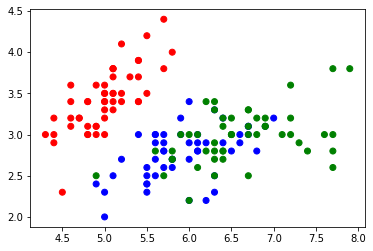

In [17]:
# show data
plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)
plt.show()

In [33]:
model = KNearest(k=3)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print('Prediction: ', predictions)

accuracy = np.sum(predictions == y_test) / len(y_test)
print('Accuracy: ', accuracy)
print(y_test)

Prediction:  [1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2]
Accuracy:  0.9
[1 0 2 2 0 0 1 2 1 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 2 1 2 2 2 2]


#Implement K-Nearest

In [11]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum(x1-x2)**2)

In [26]:
class KNearest:
  def __init__(self, k=3):
    self.k = k
  
  #training
  def fit(self, X, Y):
    self.x_train = X
    self.y_train = Y

  #predict
  def predict(self, X):
      predicted_labels = [self._predict(x) for x in X]
      return predicted_labels
  
  #Process
  def _predict(self, x_input):
    #compute distances
    distances = [euclidean_distance(x_train,x_input) for x_train in self.x_train]

    #get k nearest (argsort: return an indices array of the array after sorting)
    k_nearest_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

    #get the most commom lables
    find_common_label = Counter(k_nearest_labels).most_common(1) 
    common_label = find_common_label[0][0]

    return common_label;


In [5]:
# # Test COunter
# a = [1,1,1,2,3,4,5,6,6,6,7,8,6,2]
# from collections import Counter
# find_most_common = Counter(a)

In [ ]:
# print(find_most_common)